In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


### 1.데이터 불러오기

In [3]:
data = pd.read_csv('bike_data.csv', header=0)
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,breakdown,cumTime,cumDist,cumRide,cumBreak,intensity,meanDist,age,summer
0,1,14910,1398094,458,1,93,3052,54,0
1,1,1281,189910,78,1,148,2434,62,0
2,1,8324,769168,332,3,92,2316,57,1
3,1,31610,2988819,949,1,94,3149,105,1
4,1,5587,518114,176,1,92,2943,41,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   breakdown  40000 non-null  int64
 1   cumTime    40000 non-null  int64
 2   cumDist    40000 non-null  int64
 3   cumRide    40000 non-null  int64
 4   cumBreak   40000 non-null  int64
 5   intensity  40000 non-null  int64
 6   meanDist   40000 non-null  int64
 7   age        40000 non-null  int64
 8   summer     40000 non-null  int64
dtypes: int64(9)
memory usage: 2.7 MB


In [10]:
data.describe()

,breakdown,cumTime,cumDist,cumRide,cumBreak,intensity,meanDist,age,summer
count,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.500000,26889.632150,2.898655e+06,924.813500,3.048600,112.168825,3255.142525,198.532500,0.730075
std,0.500006,22517.767785,2.358642e+06,784.955759,3.200249,22.718946,750.066506,156.703051,0.669572
min,0.000000,1.000000,3.600000e+02,1.000000,0.000000,18.000000,360.000000,0.000000,0.000000
25%,0.000000,8527.000000,9.973368e+05,291.000000,1.000000,96.000000,2915.000000,72.000000,0.000000
50%,0.500000,20619.500000,2.280750e+06,694.000000,2.000000,105.000000,3100.000000,153.000000,1.000000
75%,1.000000,40154.500000,4.274894e+06,1379.000000,4.000000,121.000000,3377.000000,313.000000,1.000000
max,1.000000,118954.000000,1.274641e+07,4260.000000,37.000000,886.000000,29070.000000,664.000000,2.000000


### 데이터설명
desired target : <br>
1 - breakdown : 고장여부(0:고장X, 1:고장O) (numeric) <br>


input variables : <br>
2 - cumTime : 누적이용시간<br>
3 - cumDist : 누적이용거리<br>
4 - cumRide : 누적이용횟수<br>
5 - cumBreak : 누적고장횟수<br>
6 - intensity : 이용강도(단위시간 당 평균 이동 거리)<br>
7 - meanDist : 평균이용거리(1회 이용 당 평균 이동 거리)<br>
8 - age : 따릉이 수명(실제로 이용된 기간, 마지막 대여이력 - 첫 대여이력)<br>
9 - summer : 따릉이가 7월을 얼마나 겪었는지 (7월 장마기간동안 자전거의 쇠가 녹슬음)

### 2. 데이터 탐색

In [5]:
data['breakdown'].value_counts()

1    20000
0    20000
Name: breakdown, dtype: int64

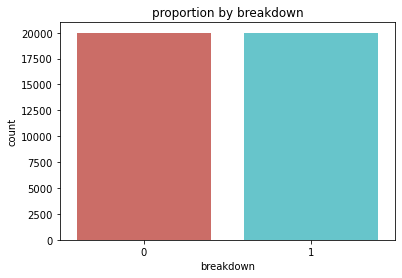

<Figure size 432x288 with 0 Axes>

In [6]:
sns.countplot(x='breakdown', data=data, palette='hls')
plt.title('proportion by breakdown')
plt.show()
plt.savefig('ml_count_plot')

<AxesSubplot:xlabel='breakdown', ylabel='cumTime'>

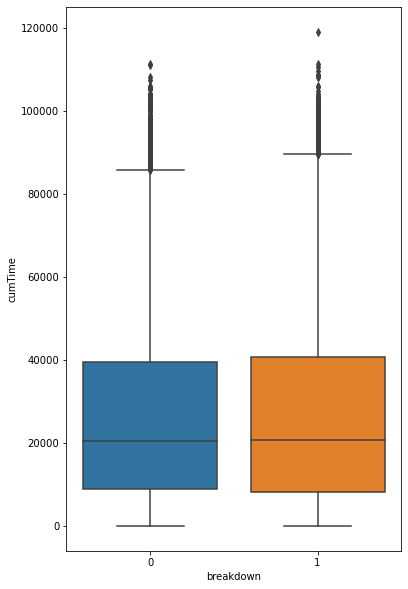

In [32]:
plt.figure(figsize=(6,10))

sns.boxplot(x='breakdown', y='cumTime', data=data)
plt.title('break vs cumTime')

plt.xlabel('break')
plt.ylabel('cum of using time')

plt.savefig('ml_break_cum_time')

<AxesSubplot:xlabel='breakdown', ylabel='cumDist'>

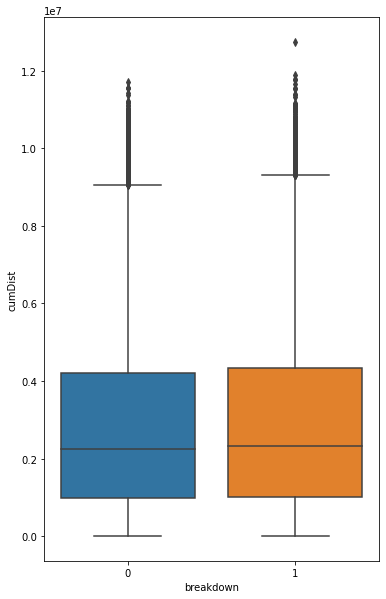

In [33]:
plt.figure(figsize=(6,10))

sns.boxplot(x='breakdown', y='cumDist', data=data)
plt.title('break vs cumDist')

plt.xlabel('break')
plt.ylabel('cum of ride distance')

plt.savefig('ml_break_cum_dist')

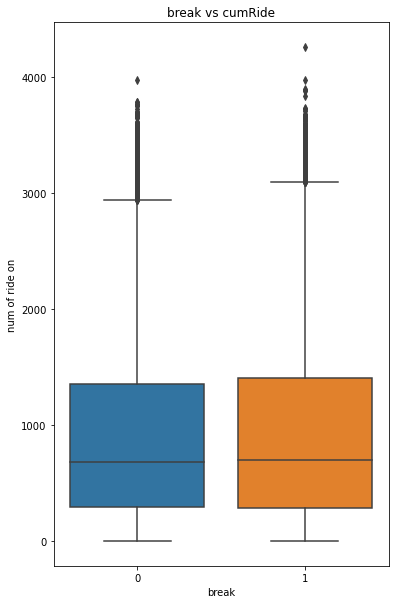

In [26]:
plt.figure(figsize=(6,10))

sns.boxplot(x='breakdown', y='cumRide', data=data)
plt.title('break vs cumRide')

plt.xlabel('break')
plt.ylabel('num of ride on')

plt.savefig('ml_break_cum_ride')

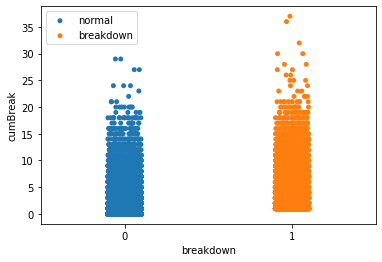

In [15]:
%matplotlib inline
sns.stripplot(x='breakdown', y='cumBreak', data=data, jitter=True)
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_break_cum_break')

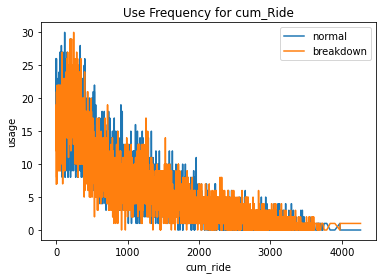

In [13]:
pd.crosstab(data.cumRide, data.breakdown).plot()
plt.title('Use Frequency for cum_Ride')
plt.xlabel('cum_ride')
plt.ylabel('usage')
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_usage_cum_ride')

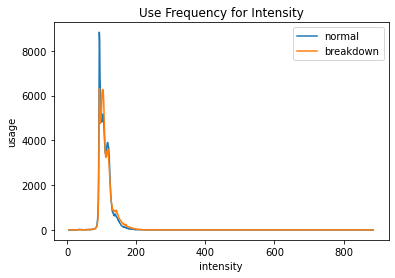

In [20]:
%matplotlib inline
pd.crosstab(data.intensity, data.breakdown).plot()
plt.title('Use Frequency for Intensity')
plt.xlabel('intensity')
plt.ylabel('usage')
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_usage_fre_intensity')

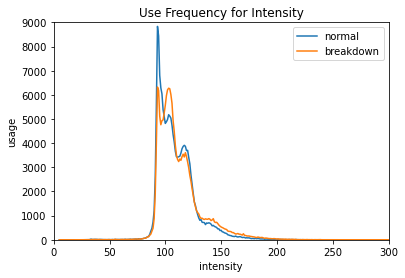

In [21]:
pd.crosstab(data.intensity, data.breakdown).plot()
plt.title('Use Frequency for Intensity')
plt.xlabel('intensity')
plt.ylabel('usage')
plt.xlim(0, 300)
plt.ylim(0,9000)
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_usage_fre_intensity2')

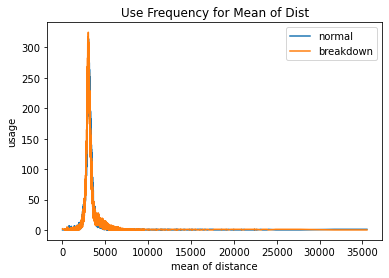

In [24]:
pd.crosstab(data.meanDist, data.breakdown).plot()
plt.title('Use Frequency for Mean of Dist')
plt.xlabel('mean of distance')
plt.ylabel('usage')
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_usage_fre_meanDist')

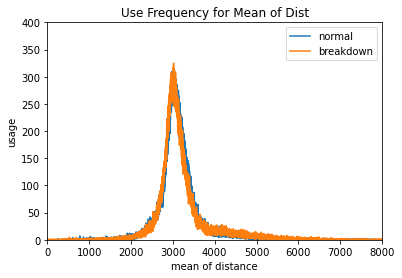

In [25]:
pd.crosstab(data.meanDist, data.breakdown).plot()
plt.title('Use Frequency for Mean of Dist')
plt.xlabel('mean of distance')
plt.ylabel('usage')
plt.xlim(0, 8000)
plt.ylim(0,400)
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_usage_fre_meanDist2')

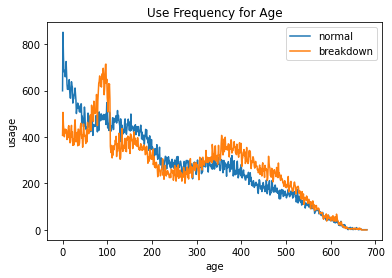

In [26]:
pd.crosstab(data.age, data.breakdown).plot()
plt.title('Use Frequency for Age')
plt.xlabel('age')
plt.ylabel('usage')
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_usage_fre_age')

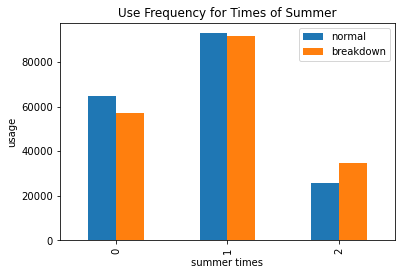

In [28]:
pd.crosstab(data.summer,data.breakdown).plot(kind='bar')
plt.title('Use Frequency for Times of Summer')
plt.xlabel('summer times')
plt.ylabel('usage')
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_usage_fre_summertimes')

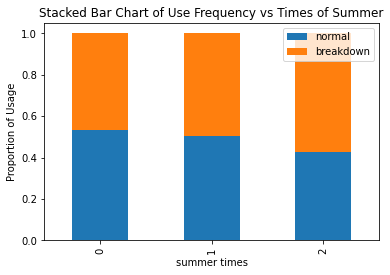

In [30]:
table=pd.crosstab(data.summer, data.breakdown)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Use Frequency vs Times of Summer')
plt.xlabel('summer times')
plt.ylabel('Proportion of Usage')
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_usage_fre_summertimes2')